In [113]:
import numpy as np 
import pandas as pd
from scipy import stats
import seaborn as sns
from scipy.stats import norm
from collections import Counter                      
import matplotlib.pyplot as plt             
%matplotlib inline    
%config IPCompleter.greedy=True
sns.set(color_codes=True)

import warnings
warnings.filterwarnings('ignore')

In [114]:
MG = pd.read_csv('MG2.csv', index_col ='Price per Unit', parse_dates=True)
MG.head()

,Unnamed: 0,Geography,Time,Product Description,UPC 13 digit,Dollar Sales No Merch,Dollar Sales Any Merch,Unit Sales No Merch,Unit Sales Any Merch,Volume Sales No Merch,...,Price per Volume Any Merch,ACV Weighted Distribution No Merch,ACV Weighted Distribution Any Merch,Base Unit Sales,Base Volume Sales,Base Dollar Sales,Incremental Units,Incremental Volume,Incremental Dollars,Total sales
Price per Unit,,,,,,,,,,,,,,,,,,,,,
2.261093,22.0,Total US - Multi Outlet + Conv,01/14/2018,FLEISCHMANNS RFG MARGARINE INDIVDL WRAP IN BOX...,2.900001e+10,60743.728470,10450.275730,25171.300260,6315.247758,25171.300260,...,1.654769,18.639388,2.094176,29216.144130,29216.144130,69448.757130,2270.403883,2270.403881,1745.247074,71194.004210
2.448055,23.0,Total US - Multi Outlet + Conv,01/14/2018,FLEISCHMANNS RFG MARGARINE INDIVDL WRAP IN BOX...,2.900001e+10,40150.017490,3097.576295,15788.140260,1877.962796,15788.140260,...,1.649434,15.849021,1.768052,16939.378830,16939.378830,42603.919130,726.724231,726.724231,643.674645,43247.593780
1.424990,199.0,Total US - Multi Outlet + Conv,01/14/2018,PRIVATE LABEL RFG MARGARINE BOX BLOCK 16 OZ - ...,4.101822e+06,2975.482341,4301.628599,2190.417946,2916.362031,2190.417946,...,1.474998,0.319728,0.189239,4573.698770,4573.698766,7114.093539,533.081207,533.081212,163.017402,7277.110940
1.835719,200.0,Total US - Multi Outlet + Conv,01/14/2018,PRIVATE LABEL RFG MARGARINE BOX BLOCK 16 OZ - ...,4.554531e+06,893.919923,49.449870,480.929975,32.966580,480.929975,...,1.500000,0.203707,0.005178,492.149246,492.149247,915.123071,21.747309,21.747308,28.246722,943.369793
0.933636,201.0,Total US - Multi Outlet + Conv,01/14/2018,PRIVATE LABEL RFG MARGARINE BOX BLOCK 16 OZ - ...,8.251196e+06,3871.344274,207.429667,4141.658444,227.040430,4141.658444,...,0.913624,0.832708,0.054653,4297.124307,4297.124307,4021.808504,71.574567,71.574567,56.965436,4078.773941


In [51]:
#MG = pd.read_excel("MG1.xlsx")
#MG.head()

,Unnamed: 0,Geography,Time,Product Description,UPC 13 digit,Dollar Sales No Merch,Dollar Sales Any Merch,Unit Sales No Merch,Unit Sales Any Merch,Volume Sales No Merch,...,Price per Volume Any Merch,ACV Weighted Distribution No Merch,ACV Weighted Distribution Any Merch,Base Unit Sales,Base Volume Sales,Base Dollar Sales,Incremental Units,Incremental Volume,Incremental Dollars,Total sales
0,22,Total US - Multi Outlet + Conv,Week Ending 01-14-18,FLEISCHMANNS RFG MARGARINE INDIVDL WRAP IN BOX...,29000008311,60743.728474,10450.275734,25171.300257,6315.247758,25171.300257,...,1.654769,18.639388,2.094176,29216.144132,29216.144134,69448.757134,2270.403883,2270.403881,1745.247074,71194.004208
1,23,Total US - Multi Outlet + Conv,Week Ending 01-14-18,FLEISCHMANNS RFG MARGARINE INDIVDL WRAP IN BOX...,29000008372,40150.017485,3097.576295,15788.140265,1877.962796,15788.140265,...,1.649434,15.849021,1.768052,16939.378830,16939.378830,42603.919135,726.724231,726.724231,643.674645,43247.593780
2,199,Total US - Multi Outlet + Conv,Week Ending 01-14-18,PRIVATE LABEL RFG MARGARINE BOX BLOCK 16 OZ - ...,4101822,2975.482341,4301.628599,2190.417946,2916.362031,2190.417946,...,1.474998,0.319728,0.189239,4573.698770,4573.698766,7114.093539,533.081207,533.081212,163.017402,7277.110940
3,200,Total US - Multi Outlet + Conv,Week Ending 01-14-18,PRIVATE LABEL RFG MARGARINE BOX BLOCK 16 OZ - ...,4554531,893.919923,49.449870,480.929975,32.966580,480.929975,...,1.500000,0.203707,0.005178,492.149246,492.149247,915.123071,21.747309,21.747308,28.246722,943.369793
4,201,Total US - Multi Outlet + Conv,Week Ending 01-14-18,PRIVATE LABEL RFG MARGARINE BOX BLOCK 16 OZ - ...,8251196,3871.344274,207.429667,4141.658444,227.040430,4141.658444,...,0.913624,0.832708,0.054653,4297.124307,4297.124307,4021.808504,71.574567,71.574567,56.965436,4078.773941


In [115]:
MG = MG.dropna()

In [116]:
MG

,Unnamed: 0,Geography,Time,Product Description,UPC 13 digit,Dollar Sales No Merch,Dollar Sales Any Merch,Unit Sales No Merch,Unit Sales Any Merch,Volume Sales No Merch,...,Price per Volume Any Merch,ACV Weighted Distribution No Merch,ACV Weighted Distribution Any Merch,Base Unit Sales,Base Volume Sales,Base Dollar Sales,Incremental Units,Incremental Volume,Incremental Dollars,Total sales
Price per Unit,,,,,,,,,,,,,,,,,,,,,
2.261093,22.0,Total US - Multi Outlet + Conv,01/14/2018,FLEISCHMANNS RFG MARGARINE INDIVDL WRAP IN BOX...,2.900001e+10,60743.728470,10450.275730,25171.300260,6315.247758,25171.300260,...,1.654769,18.639388,2.094176,29216.144130,29216.144130,69448.757130,2270.403883,2270.403881,1745.247074,71194.004210
2.448055,23.0,Total US - Multi Outlet + Conv,01/14/2018,FLEISCHMANNS RFG MARGARINE INDIVDL WRAP IN BOX...,2.900001e+10,40150.017490,3097.576295,15788.140260,1877.962796,15788.140260,...,1.649434,15.849021,1.768052,16939.378830,16939.378830,42603.919130,726.724231,726.724231,643.674645,43247.593780
1.424990,199.0,Total US - Multi Outlet + Conv,01/14/2018,PRIVATE LABEL RFG MARGARINE BOX BLOCK 16 OZ - ...,4.101822e+06,2975.482341,4301.628599,2190.417946,2916.362031,2190.417946,...,1.474998,0.319728,0.189239,4573.698770,4573.698766,7114.093539,533.081207,533.081212,163.017402,7277.110940
1.835719,200.0,Total US - Multi Outlet + Conv,01/14/2018,PRIVATE LABEL RFG MARGARINE BOX BLOCK 16 OZ - ...,4.554531e+06,893.919923,49.449870,480.929975,32.966580,480.929975,...,1.500000,0.203707,0.005178,492.149246,492.149247,915.123071,21.747309,21.747308,28.246722,943.369793
0.933636,201.0,Total US - Multi Outlet + Conv,01/14/2018,PRIVATE LABEL RFG MARGARINE BOX BLOCK 16 OZ - ...,8.251196e+06,3871.344274,207.429667,4141.658444,227.040430,4141.658444,...,0.913624,0.832708,0.054653,4297.124307,4297.124307,4021.808504,71.574567,71.574567,56.965436,4078.773941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.127205,247075.0,West - IRI Standard - Multi Outlet + Conv,01/01/2023,LAND O LAKES RFG MARGARINE INDIVDL WRAP IN BOX...,3.450014e+10,303.772720,53.600000,143.001045,25.000000,143.001045,...,2.144000,0.589657,0.122587,160.771045,160.771045,344.283419,7.230000,7.230000,13.089301,357.372720
3.595842,247076.0,West - IRI Standard - Multi Outlet + Conv,01/01/2023,LAND O LAKES RFG MARGARINE PLASTIC TUB SPREAD ...,3.450014e+10,337.689040,12.621373,94.408712,3.012261,88.508167,...,4.469333,0.512443,0.014510,96.095578,90.089604,345.427739,1.325395,1.242558,4.882674,350.310413
3.755126,247142.0,West - IRI Standard - Multi Outlet + Conv,01/01/2023,MELT RFG BUTTERY MARGARINE PLASTIC TUB STICK 8...,8.560140e+11,1261.952556,102.708112,324.389898,39.022839,162.194949,...,5.264000,3.071673,0.161471,356.388625,178.194312,1367.350901,7.024112,3.512056,-2.690232,1364.660669


In [117]:
for pair in enumerate (MG.columns): print(pair)

(0, 'Unnamed: 0')
(1, 'Geography')
(2, 'Time')
(3, 'Product Description')
(4, 'UPC 13 digit')
(5, 'Dollar Sales No Merch')
(6, 'Dollar Sales Any Merch')
(7, 'Unit Sales No Merch')
(8, 'Unit Sales Any Merch')
(9, 'Volume Sales No Merch')
(10, 'Volume Sales Any Merch')
(11, 'Price per Unit No Merch')
(12, 'Price per Unit Any Merch')
(13, 'Price per Volume')
(14, 'Price per Volume No Merch')
(15, 'Price per Volume Any Merch')
(16, 'ACV Weighted Distribution No Merch')
(17, 'ACV Weighted Distribution Any Merch')
(18, 'Base Unit Sales')
(19, 'Base Volume Sales')
(20, 'Base Dollar Sales')
(21, 'Incremental Units')
(22, 'Incremental Volume')
(23, 'Incremental Dollars')
(24, 'Total sales')


In [118]:
df = (MG.mean(),MG.std())
df = pd.concat(df,1)
df.columns = ['mean', 'std dev']
df

,mean,std dev
Unnamed: 0,1.223107e+05,7.651003e+04
UPC 13 digit,1.672345e+11,8.471015e+11
Dollar Sales No Merch,8.244546e+03,2.920913e+04
Dollar Sales Any Merch,1.453357e+03,6.674154e+03
Unit Sales No Merch,4.145084e+03,1.406045e+04
Unit Sales Any Merch,8.246354e+02,3.813837e+03
Volume Sales No Merch,4.140145e+03,1.452906e+04
Volume Sales Any Merch,8.342494e+02,3.946699e+03
Price per Unit No Merch,2.248006e+00,1.064441e+00
Price per Unit Any Merch,1.920632e+00,9.391743e-01


In [119]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('default')
%matplotlib inline

<AxesSubplot:xlabel='Total sales', ylabel='Density'>

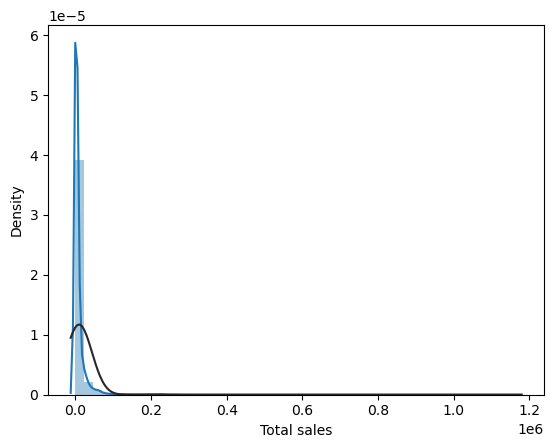

In [120]:
sns.distplot(MG['Total sales'],fit = norm)



<AxesSubplot:xlabel='Price per Volume', ylabel='Density'>

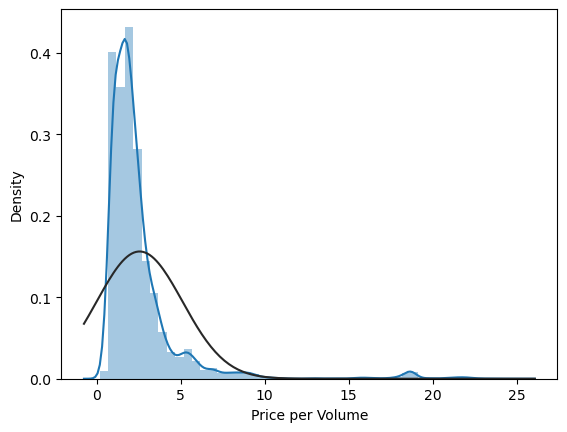

In [123]:
sns.distplot(MG['Price per Volume'],fit = norm)

<AxesSubplot:xlabel='Dollar Sales No Merch'>

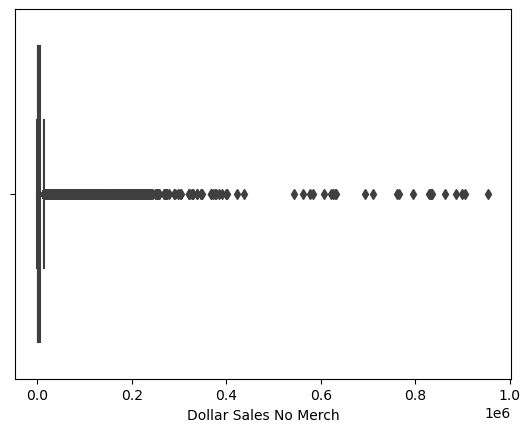

In [121]:
sns.boxplot(x=MG['Dollar Sales No Merch'])

<AxesSubplot:xlabel='Dollar Sales Any Merch'>

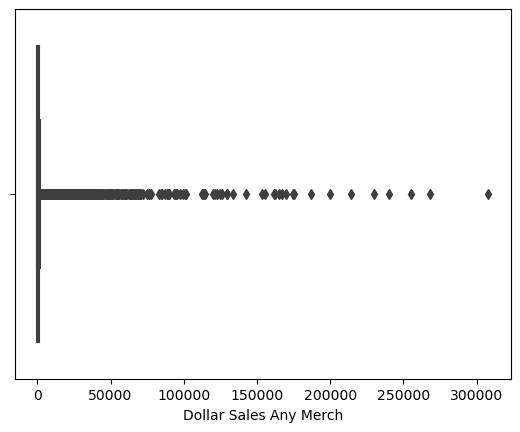

In [122]:
sns.boxplot(x=MG['Dollar Sales Any Merch'])

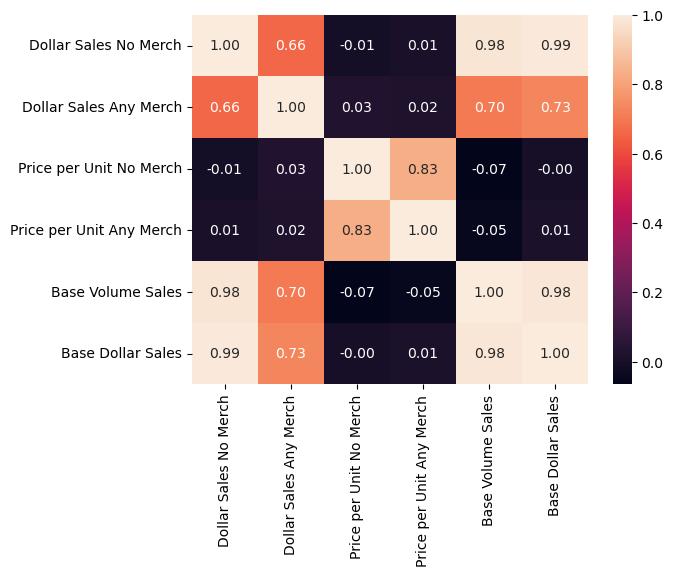

In [125]:
list1 = ["Dollar Sales No Merch","Dollar Sales Any Merch","Price per Unit No Merch","Price per Unit Any Merch","Base Volume Sales","Base Dollar Sales"]
sns.heatmap(MG[list1].corr(), annot = True , fmt=".2f")
plt.show()

In [128]:
import pandas as pd



# Calculate the correlation between price per unit and dollar sales
corr = MG['Price per Volume'].corr(MG['Total sales'])

print('Correlation between price per Volume and dollar sales:', corr)


Correlation between price per Volume and dollar sales: -0.02509813135106411


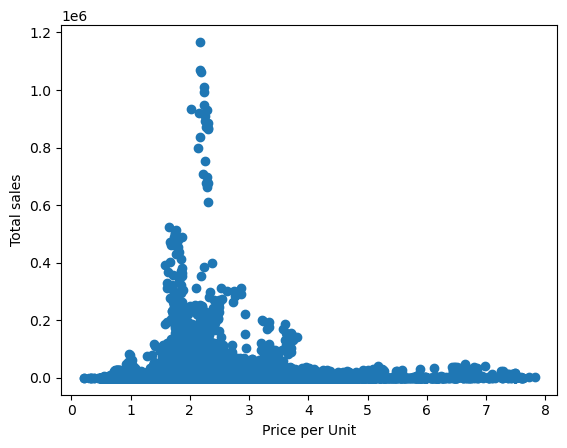

In [13]:
import matplotlib.pyplot as plt

# Create a scatter plot of price per unit vs. dollar sales
plt.scatter(MG['Price per Unit'], MG['Total sales'])
plt.xlabel('Price per Unit')
plt.ylabel('Total sales')
plt.show()

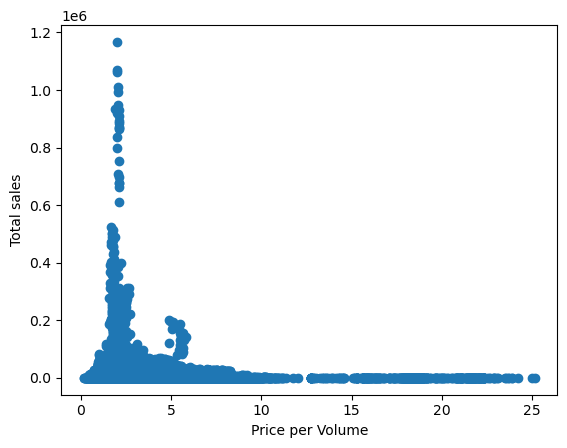

In [112]:
import matplotlib.pyplot as plt

# Create a scatter plot of price per unit vs. dollar sales
plt.scatter(MG['Price per Volume'], MG['Total sales'])
plt.xlabel('Price per Volume')
plt.ylabel('Total sales')
plt.show()

In [14]:
import statsmodels.api as sm
x = MG['Price per Unit']
y = MG['Total sales']

mod = sm.OLS(y,x)

res = mod.fit()

print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:            Total sales   R-squared (uncentered):                   0.064
Model:                            OLS   Adj. R-squared (uncentered):              0.064
Method:                 Least Squares   F-statistic:                              2573.
Date:                Fri, 05 May 2023   Prob (F-statistic):                        0.00
Time:                        22:38:16   Log-Likelihood:                     -4.4747e+05
No. Observations:               37732   AIC:                                  8.949e+05
Df Residuals:                   37731   BIC:                                  8.950e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [15]:
intercept = res.params[0]

print("Intercept:", intercept)

Intercept: 3779.922006764284


In [16]:
import statsmodels.api as sm
y = MG['Dollar Sales No Merch']
x = MG['Price per Unit No Merch']

mod = sm.OLS(y,x)

res = mod.fit()

print(res.summary())

                                  OLS Regression Results                                  
Dep. Variable:     Dollar Sales No Merch   R-squared (uncentered):                   0.059
Model:                               OLS   Adj. R-squared (uncentered):              0.059
Method:                    Least Squares   F-statistic:                              2354.
Date:                   Fri, 05 May 2023   Prob (F-statistic):                        0.00
Time:                           22:38:21   Log-Likelihood:                     -4.4181e+05
No. Observations:                  37732   AIC:                                  8.836e+05
Df Residuals:                      37731   BIC:                                  8.836e+05
Df Model:                              1                                                  
Covariance Type:               nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975

In [17]:
intercept = res.params[0]

print("Intercept:", intercept)

Intercept: 2956.896459648006


In [18]:
import statsmodels.api as sm
x = MG['Price per Unit Any Merch']
y = MG['Dollar Sales Any Merch']

mod = sm.OLS(y,x)

res = mod.fit()

print(res.summary())

                                   OLS Regression Results                                  
Dep. Variable:     Dollar Sales Any Merch   R-squared (uncentered):                   0.040
Model:                                OLS   Adj. R-squared (uncentered):              0.040
Method:                     Least Squares   F-statistic:                              1580.
Date:                    Fri, 05 May 2023   Prob (F-statistic):                        0.00
Time:                            22:38:27   Log-Likelihood:                     -3.8591e+05
No. Observations:                   37732   AIC:                                  7.718e+05
Df Residuals:                       37731   BIC:                                  7.718e+05
Df Model:                               1                                                  
Covariance Type:                nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025

In [19]:
intercept = res.params[0]

print("Intercept:", intercept)

Intercept: 640.5235161062312


In [136]:
import statsmodels.api as sm
x = MG[['Price per Volume']]
y = MG['Total sales']

mod = sm.OLS(y,x)

res = mod.fit()

print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:            Total sales   R-squared (uncentered):                   0.031
Model:                            OLS   Adj. R-squared (uncentered):              0.031
Method:                 Least Squares   F-statistic:                              1215.
Date:                Sun, 07 May 2023   Prob (F-statistic):                   4.70e-262
Time:                        15:22:48   Log-Likelihood:                     -4.4812e+05
No. Observations:               37732   AIC:                                  8.962e+05
Df Residuals:                   37731   BIC:                                  8.962e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [137]:
intercept = res.params[0]

print("Intercept:", intercept)

Intercept: 1729.6578558957265


In [20]:
import statsmodels.api as sm
x = MG[['Price per Unit','Price per Volume']]
y = MG['Total sales']

mod = sm.OLS(y,x)

res = mod.fit()

print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:            Total sales   R-squared (uncentered):                   0.065
Model:                            OLS   Adj. R-squared (uncentered):              0.065
Method:                 Least Squares   F-statistic:                              1315.
Date:                Fri, 05 May 2023   Prob (F-statistic):                        0.00
Time:                        22:38:32   Log-Likelihood:                     -4.4744e+05
No. Observations:               37732   AIC:                                  8.949e+05
Df Residuals:                   37730   BIC:                                  8.949e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [138]:
import statsmodels.api as sm
x = MG[['Price per Volume No Merch','Price per Volume Any Merch','Price per Unit No Merch','Price per Unit Any Merch']]
y = MG['Total sales']

mod = sm.OLS(y,x)

res = mod.fit()

print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:            Total sales   R-squared (uncentered):                   0.065
Model:                            OLS   Adj. R-squared (uncentered):              0.065
Method:                 Least Squares   F-statistic:                              653.2
Date:                Sun, 07 May 2023   Prob (F-statistic):                        0.00
Time:                        15:23:10   Log-Likelihood:                     -4.4745e+05
No. Observations:               37732   AIC:                                  8.949e+05
Df Residuals:                   37728   BIC:                                  8.949e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [139]:
intercept = res.params[0]

print("Intercept:", intercept)

Intercept: -368.73765121023683
